<a href="https://colab.research.google.com/github/nguyenthanh222/phantichdulieu/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
data= pd.read_csv("https://raw.githubusercontent.com/huynhhoc/phantichdulieu/main/Data/babies.txt",sep="\s+")

In [26]:
data

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


In [27]:
df_cohutthuoc=pd.DataFrame(data,columns=['bwt','smoke']).query('smoke==1')
df_khonghutthuoc=pd.DataFrame(data,columns=['bwt','smoke']).query('smoke==0')


In [28]:
df_cohutthuoc

,bwt,smoke
2,128,1
4,108,1
9,143,1
11,144,1
12,141,1
...,...,...
1224,143,1
1225,113,1
1226,109,1
1227,103,1


In [29]:
df_cohutthuoc.describe()

,bwt,smoke
count,484.000000,484.0
mean,114.109504,1.0
std,18.098946,0.0
min,58.000000,1.0
25%,102.000000,1.0
50%,115.000000,1.0
75%,126.000000,1.0
max,163.000000,1.0


In [30]:
df_khonghutthuoc.describe()

,bwt,smoke
count,742.000000,742.0
mean,123.047170,0.0
std,17.398689,0.0
min,55.000000,0.0
25%,113.000000,0.0
50%,123.000000,0.0
75%,134.000000,0.0
max,176.000000,0.0


In [33]:
from scipy.stats import kurtosis
from scipy.stats import skew
import numpy as np
d = {'Bà mẹ hút thuốc' : pd.Series([df_cohutthuoc['bwt'].count(),df_cohutthuoc['bwt'].min(),
                        df_cohutthuoc['bwt'].max(),df_cohutthuoc['bwt'].mean(),
                        df_cohutthuoc['bwt'].std(skipna=True),df_cohutthuoc['bwt'].var(skipna=True),
                        df_cohutthuoc['bwt'].median(),df_cohutthuoc['bwt'].quantile(.0),
                        df_cohutthuoc['bwt'].quantile(.25),df_cohutthuoc['bwt'].quantile(.5),
                        df_cohutthuoc['bwt'].quantile(.75),df_cohutthuoc['bwt'].quantile(1),
                        df_cohutthuoc['bwt'].quantile(.75)-df_cohutthuoc['bwt'].quantile(.25),
                        df_cohutthuoc['bwt'].kurtosis()+3,df_cohutthuoc['bwt'].skew()],
                       index=['Số lượng','Min','Max','Mean','Sd','Var','Median','Quantile 0%',
                              'Quantile 25%','Quantile 50%','Quantile 75%','Quantile 100%','IQR',
                              'Kurtosis','Skewness']),
      'Bà mẹ không hút thuốc' : pd.Series([df_khonghutthuoc['bwt'].count(),df_khonghutthuoc['bwt'].min(),
                        df_khonghutthuoc['bwt'].max(),df_khonghutthuoc['bwt'].mean(),
                        df_khonghutthuoc['bwt'].std(skipna=True),df_khonghutthuoc['bwt'].var(skipna=True),
                        df_khonghutthuoc['bwt'].median(),df_khonghutthuoc['bwt'].quantile(.0),
                        df_khonghutthuoc['bwt'].quantile(.25),df_khonghutthuoc['bwt'].quantile(.5),
                        df_khonghutthuoc['bwt'].quantile(.75),df_khonghutthuoc['bwt'].quantile(1),
                        df_khonghutthuoc['bwt'].quantile(.75)-df_khonghutthuoc['bwt'].quantile(.25),
                        df_khonghutthuoc['bwt'].kurtosis()+3,df_khonghutthuoc['bwt'].skew()],
                       index=['Số lượng','Min','Max','Mean','Sd','Var','Median','Quantile 0%',
                              'Quantile 25%','Quantile 50%','Quantile 75%','Quantile 100%','IQR',
                              'Kurtosis','Skewness'])
     }


In [34]:
df = pd.DataFrame(d)
df

,Bà mẹ hút thuốc,Bà mẹ không hút thuốc
Số lượng,484.000000,742.000000
Min,58.000000,55.000000
Max,163.000000,176.000000
Mean,114.109504,123.047170
Sd,18.098946,17.398689
Var,327.571835,302.714371
Median,115.000000,123.000000
Quantile 0%,58.000000,55.000000
Quantile 25%,102.000000,113.000000
Quantile 50%,115.000000,123.000000


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df = df_khonghutthuoc, x = 'bwt',color = 'navy',kde = True, bins=12)

ValueError: ignored

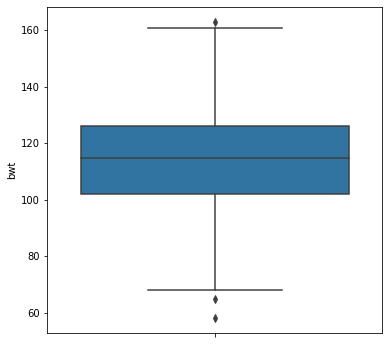

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df_cohutthuoc['bwt'])

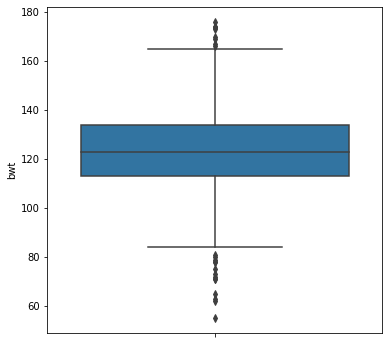

In [46]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df_khonghutthuoc['bwt'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


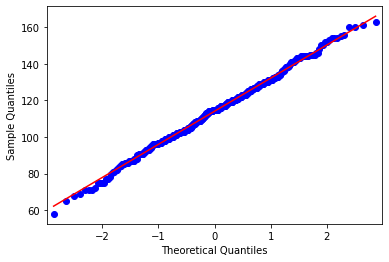

In [44]:
from scipy.stats.stats import pearsonr
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
qqplot_cohutthuoc = qqplot(df_cohutthuoc['bwt'],line='s')
plt.show()

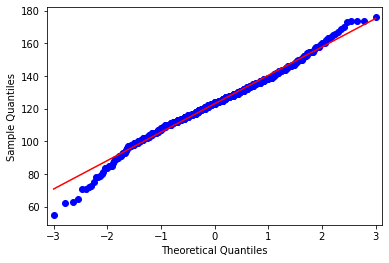

In [45]:
qqplot_khonghutthuoc = qqplot(df_khonghutthuoc['bwt'],line='s')
plt.show()